## การทำนายค่ามัธยฐานของราคาบ้านในแต่ละเขตพื้นที่

**เป้าหมาย**

สร้างโมเดลทำนายค่ามัธยฐานของราคาบ้านของแต่ละพื้นที่


1. ทำความเข้าใจธุรกิจและข้อมูลที่มี

เมื่อเริ่มโครงการวิทยาศาสตร์ข้อมูล สิ่งแรกที่จะต้องตั้งคำถามคือ เป้าหมายทางธุรกิจคืออะไร เพราะว่าการสร้างโมเดลอาจจะไม่ใช่เป้าหมายสุดท้ายที่เราต้องการ นักวิทยาศาสตร์ข้อมูลที่ดีจะต้องพยายามทำความเข้าใจธุรกิจในภาพกว้างว่า โมเดลที่เราสร้างขึ้นนี้จะถูกนำไปใช้อย่างไรเพื่ออะไร การกำหนดเป้าหมายทางธุรกิจนี้ มีความสำคัญมากเนื่องจากจะทำให้เราสามารถเลือกอัลกอริทึมและวิธีการประเมินประสิทธิภาพที่เหมาะสมที่สุดได้

จากตัวอย่างนี้ นักวิทยาศาสตร์ข้อมูลพบว่าโมเดลที่สร้างขึ้นจะถูกนำไปใช้ในการทำนายราคาบ้านซึ่งบริษัทต้องการนำไปใช้ร่วมกันกับค่าดัชนีอื่น ๆ เพื่อใช้ในการวิเคราะห์การลงทุนด้านอสังหาริมทรัพย์ของบริษัท โดยคำทำนายราคาบ้านที่ได้จากโมเดลของเราจะเป็นปัจจัยสำคัญที่บริษัทใช้เป็นบรรทัดฐานในการตัดสินใจว่าจะลงทุนอสังหาริมทรัพย์ในพื้นที่นั้น ๆ หรือไม่

ลำดับถัดไป นักวิทยาศาสตร์ข้อมูลต้องทำความเข้าใจวิธีการทำนายราคาบ้านปัจจุบันที่ใช้กันอยู่ในบริษัท ซึ่งจากการสอบถามพบว่า ราคาบ้านจะถูกทำนายโดยผู้เชี่ยวชาญซึ่งมีข้อมูลล่าสุดในด้านต่างๆ ของเขตพื้นที่นั้น และหากผู้เชี่ยวชาญไม่สามารถหาค่ามัธยฐานของราคาบ้านได้จากข้อมูลที่รวบรวมมา พวกเขาก็จะใช้การคำนวณที่ซับซ้อนบางอย่างเพื่อหาคำทำนายที่ต้องการ

การทำนายราคาบ้านแบบปัจจุบันเสียเวลาและค่าใช้จ่ายสูงมาก นอกจากนี้ยังอาจมีความคลาดเคลื่อนสูงถึง 20% บริษัทจึงได้ตัดสินใจใช้วิทยาศาสตร์ข้อมูลมาช่วยแก้ปัญหาดังกล่าว และข้อมูล California Housing Prices ก็น่าจะเป็นข้อมูลที่เหมาะสมเนื่องจากเป็นข้อมูลที่มีค่ามัธยฐานของราคาบ้าน และจำนวนตัวอย่างข้อมูลกว่าสองหมื่นตัวอย่าง

2. การกำหนดปัญหา

ณ จุดนี้ เรามีความเข้าใจเพียงพอสำหรับกำหนดประเภทของปัญหาได้ นักวิทยาศาสตร์ข้อมูลจะต้องกำหนดประเภทของปัญหาว่าเป็นแบบใด กล่าวคือ

(1) รูปแบบการเรียนรู้คือการเรียนรู้แบบใด : supervised learning, unsupervised learning, หรือ reinforcement learning?

(2) หากเป็น supervised learning จะเป็นแบบ classification หรือ regression?

สำหรับตัวอย่างนี้ ปัญหาการทำนายค่ามัธยฐานของราคาบ้านโดยใช้ชุดข้อมูล California Housing Price คำตอบข้อ (1) คือการเรียนรู้แบบ supervised learning เนื่องจากชุดข้อมูลที่ใช้นี้มีคำตอบที่ต้องการคือค่ามัธยฐานของราคาบ้านรวมอยู่ด้วย ส่วนข้อ (2) คำตอบคือ regression เนื่องจากสิ่งที่ต้องการทำนายคือมัธยฐานของราคาบ้านเป็นค่าตัวเลข ไม่ใช่ประเภทหรือคลาส

3. เลือกวิธีการประสิทธิภาพของโมเดล


ในที่นี้เราจะใช้ Root Mean Squared Error (RMSE) ในการวัดความประสิทธิภาพของการทำนายราคาบ้าน ค่า RMSE ที่น้อยกว่าจะหมายถึงโมเดลมีประสิทธิภาพสูงกว่า สูตรสำหรับคำนวณค่า RMSE ของโมเดล $h$ บนชุดข้อมูล $X$ คือ

$RMSE(X, h) = \sqrt{\frac{1}{m}\sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^2}$

เมื่อ 

- $h(x^{(i)})$ คือคำทำนายค่ามัธยฐานของราคาบ้านของโมเดล $h$ เมื่ออินพุทคือ $x^{(i)}$ ตัวอย่างข้อมูลลำดับที่ i
- $ y^{(i)})$ คือค่ามัธยฐานของราคาบ้าน (ค่าจริง) ของอินพุท $x^{(i)}$ 



4. เตรียมข้อมูล

4.1 ดาวน์โหลดข้อมูลจาก repository

In [1]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

ในที่นี้เราใช้ฟังก์ชัน `fetch_california_housing` จากโมดูล `sklearn.datasets` ของไลบารี่ `scikit-learn` ฟังก์ชัน `fetch_california_housing` จะรีเทิร์น Dictionary-like object ที่ประกอบด้วยคีย์ต่อไปนี้คือ
* data : numpy array ขนาด (20640,8)
* target : numpy array ขนาด (20640,)
* feature_names: list ความยาว 8
* DESCR  : สตริงที่อธิบายข้อมูลเกี่ยวกับดาต้าเซต
* frame : pandas DataFrame ของดาต้าเซต

In [2]:
# แสดงข้อมูลเกี่ยวกับ California Housing Price Dataset
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# เราจะใช้ pandas DataFrame ในการสำรวจข้อมูล
hf = housing.frame
# แสดง 5 instances แรกในชุดข้อมูล
hf.head()
hf.to_csv('housing.csv',index=False)

In [4]:
# แสดงข้อมูลเกี่ยวกับ DataFrame
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<AxesSubplot:>

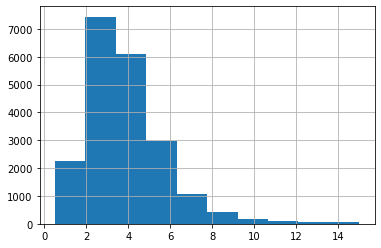

In [5]:
hf['MedInc'].hist()

In [6]:
import pandas as pd
import numpy as np
hf['income_cat'] = pd.cut(hf['MedInc'], bins=[0., 1.5, 3.0, 4.5, 6.,np.inf])
hf['income_cat'].value_counts()

(3.0, 4.5]    7236
(1.5, 3.0]    6581
(4.5, 6.0]    3639
(6.0, inf]    2362
(0.0, 1.5]     822
Name: income_cat, dtype: int64

4.2 สำรวจข้อมูล (Data Exploration)

In [7]:
hf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   MedInc       20640 non-null  float64 
 1   HouseAge     20640 non-null  float64 
 2   AveRooms     20640 non-null  float64 
 3   AveBedrms    20640 non-null  float64 
 4   Population   20640 non-null  float64 
 5   AveOccup     20640 non-null  float64 
 6   Latitude     20640 non-null  float64 
 7   Longitude    20640 non-null  float64 
 8   MedHouseVal  20640 non-null  float64 
 9   income_cat   20640 non-null  category
dtypes: category(1), float64(9)
memory usage: 1.4 MB


In [8]:
# แสดงสถิติเบื้องต้นเกี่ยวกับชุดข้อมูล
hf.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<AxesSubplot:title={'center':'MedInc'}>,
        <AxesSubplot:title={'center':'HouseAge'}>,
        <AxesSubplot:title={'center':'AveRooms'}>],
       [<AxesSubplot:title={'center':'AveBedrms'}>,
        <AxesSubplot:title={'center':'Population'}>,
        <AxesSubplot:title={'center':'AveOccup'}>],
       [<AxesSubplot:title={'center':'Latitude'}>,
        <AxesSubplot:title={'center':'Longitude'}>,
        <AxesSubplot:title={'center':'MedHouseVal'}>]], dtype=object)

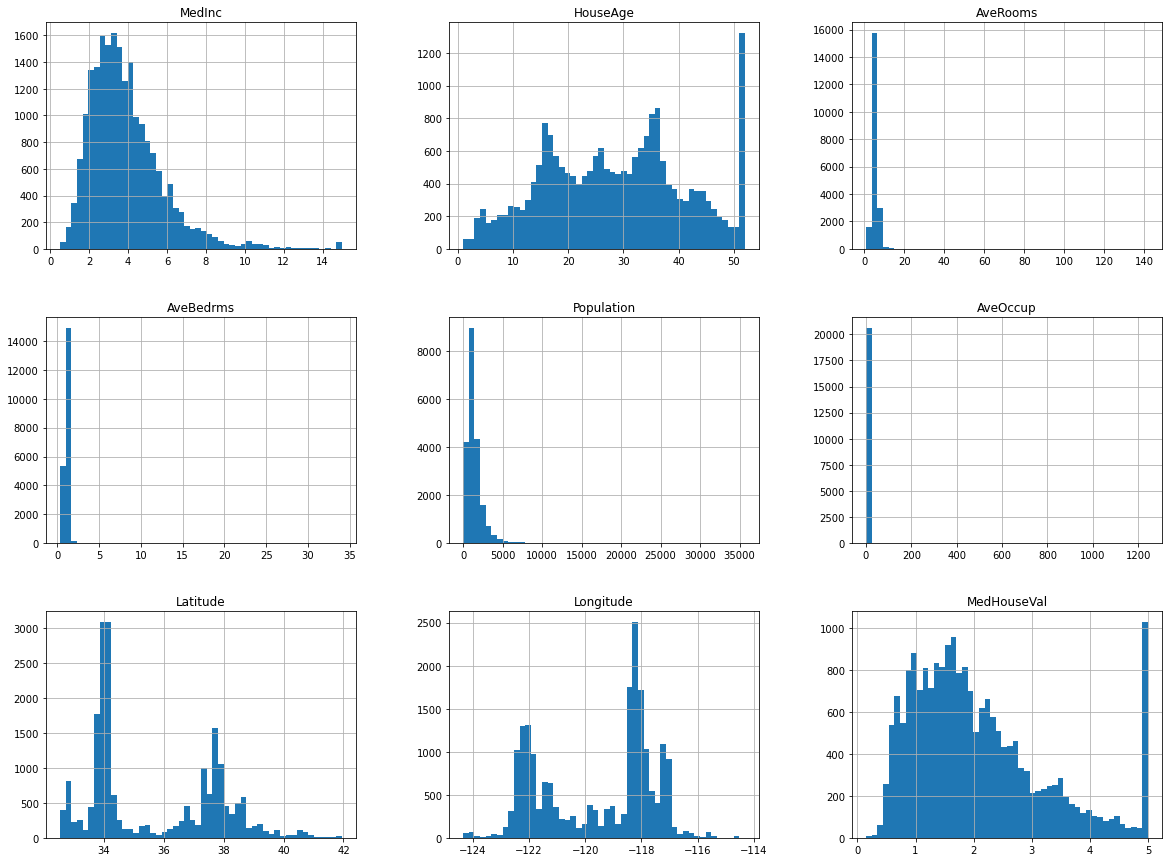

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
hf.hist(bins=50, figsize=(20,15))

4.3 แบ่งชุดข้อมูลออกเป็น training และ test datasets

In [10]:
from sklearn.model_selection import train_test_split

X = housing.data
y = housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

4.4 สร้างโมเดล Regression

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

4.5 ทดสอบประสิทธิภาพโดยการทำนายราคาบ้านของชุดข้อมูลทดสอบ

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np # np.sqrt()

lin_predict = lin_reg.predict(X_test) 
lin_mse = mean_squared_error(y_test, lin_predict)
lin_rmse = np.sqrt(lin_mse)
print("RMSE of Linear Regressor = ", lin_rmse)

rf_predict = rf_reg.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predict)
rf_rmse = np.sqrt(rf_mse)
print("RMSE of Random Forest Regressor  = ", rf_rmse)